In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
##df=pd.read_csv('sales.csv')
## There was a unicoding error while executing it, hence we'll try another method

In [7]:
try:
    sales_df = pd.read_csv('sales.csv', encoding='latin1')
except UnicodeDecodeError:
    try:
        sales_df = pd.read_csv('/mnt/data/sales.csv', encoding='ISO-8859-1')
    except UnicodeDecodeError:
        sales_df = pd.read_csv('/mnt/data/sales.csv', encoding='cp1252')

sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
# General Overview: Basic statistics and info about numerical columns
numerical_overview = sales_df.describe()

# Basic info about categorical columns
categorical_overview = sales_df.describe(include=['O'])

# Check for missing values
missing_values = sales_df.isnull().sum()

In [10]:
numerical_overview

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
categorical_overview

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,05-09-2016,16-12-2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [12]:
missing_values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

##  General Overview Insights



## EDA

In [13]:
# Convert 'Order Date' to datetime format
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])

# Aggregate sales by order date
sales_trends = sales_df.groupby('Order Date')['Sales'].sum().reset_index()

C:\Users\adisr\AppData\Local\Temp\ipykernel_25780\1263433575.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])


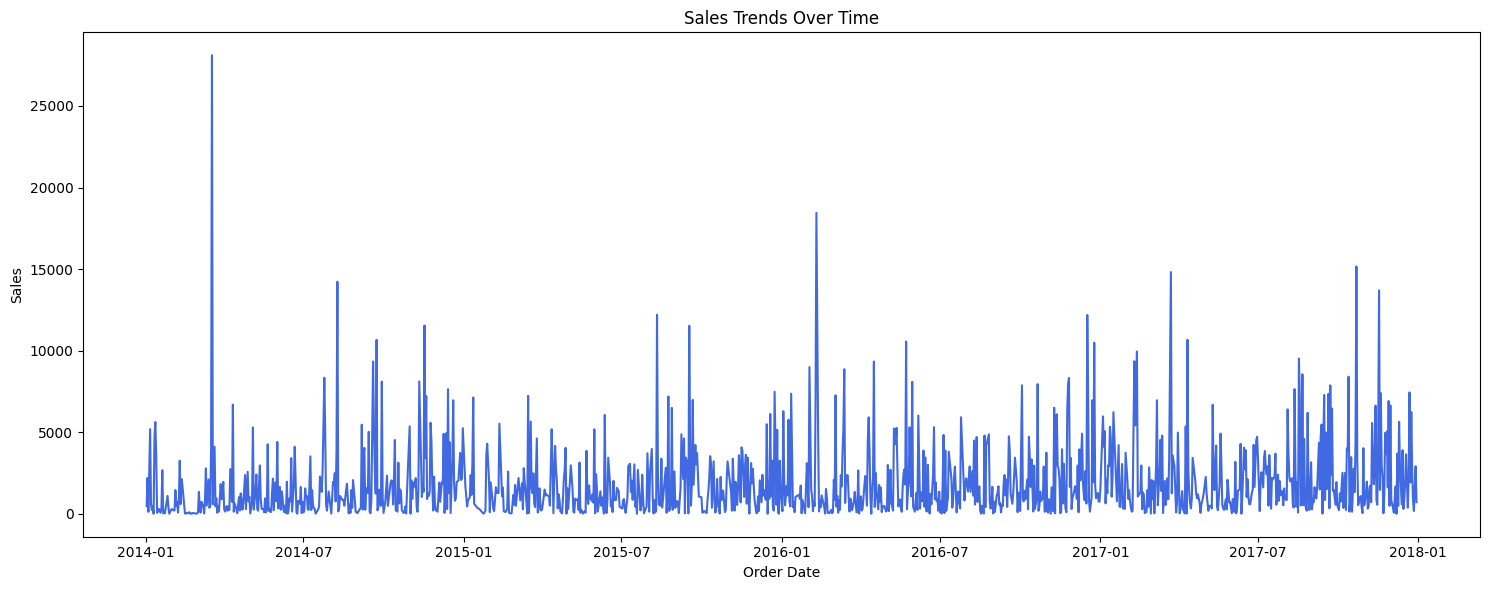

In [16]:
# Plotting sales trends over time
plt.figure(figsize=(15, 6))
plt.plot(sales_trends['Order Date'], sales_trends['Sales'], color='royalblue')
plt.title('Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.tight_layout()

plt.show()

## Insights from Sales Trends

1. Periodic Spikes: The observed spikes could correspond to peak shopping seasons, like the holiday season at the end of the year, back-to-school sales, or other promotional periods.

2. Variability: Sales fluctuate significantly over time, highlighting the importance of understanding seasonal trends, customer behavior, and promotional impacts on sales performance.

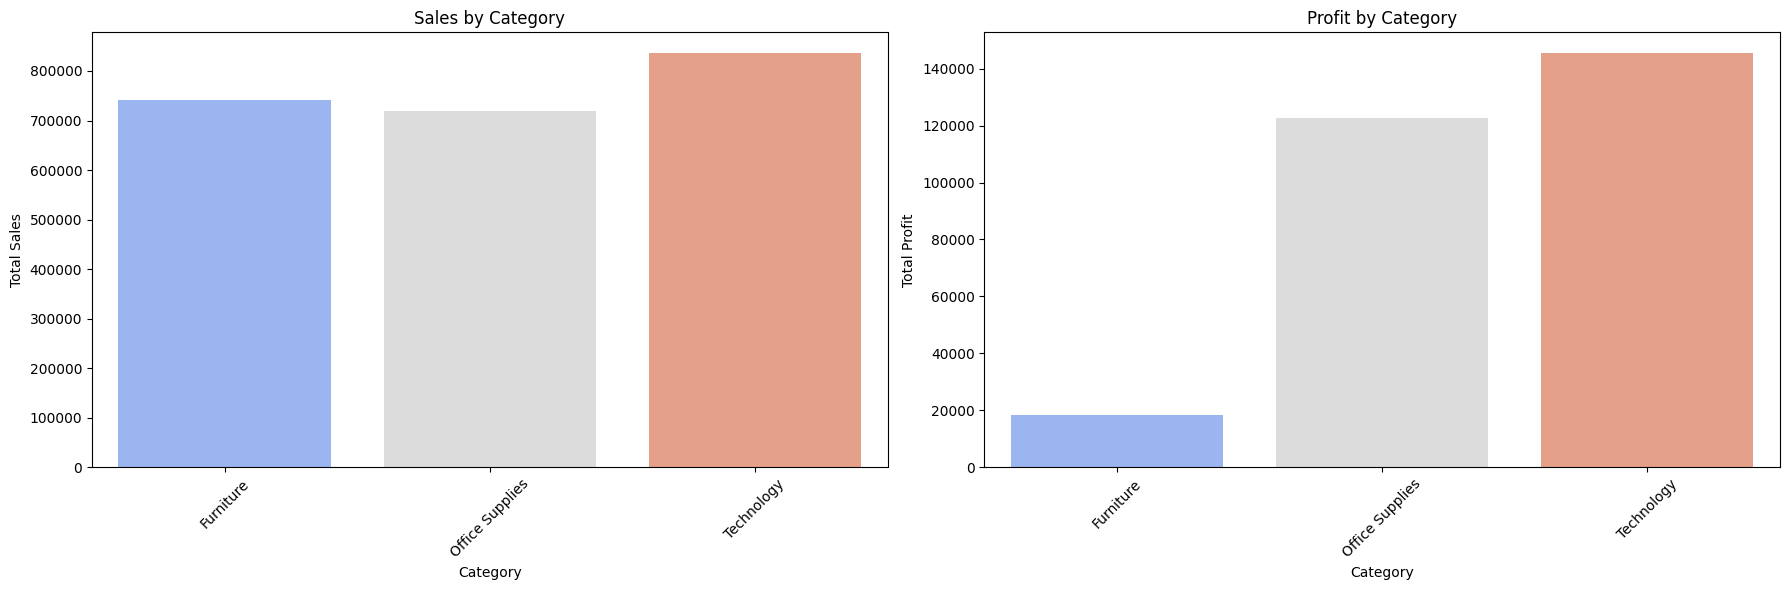

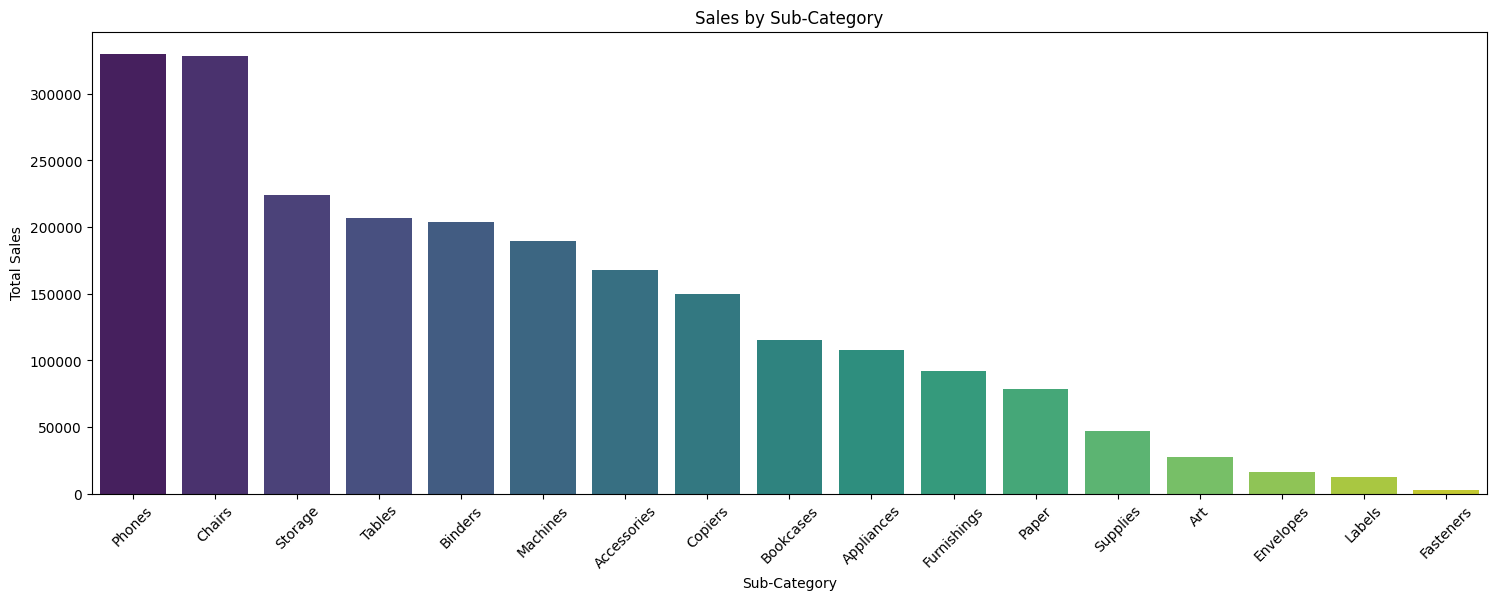

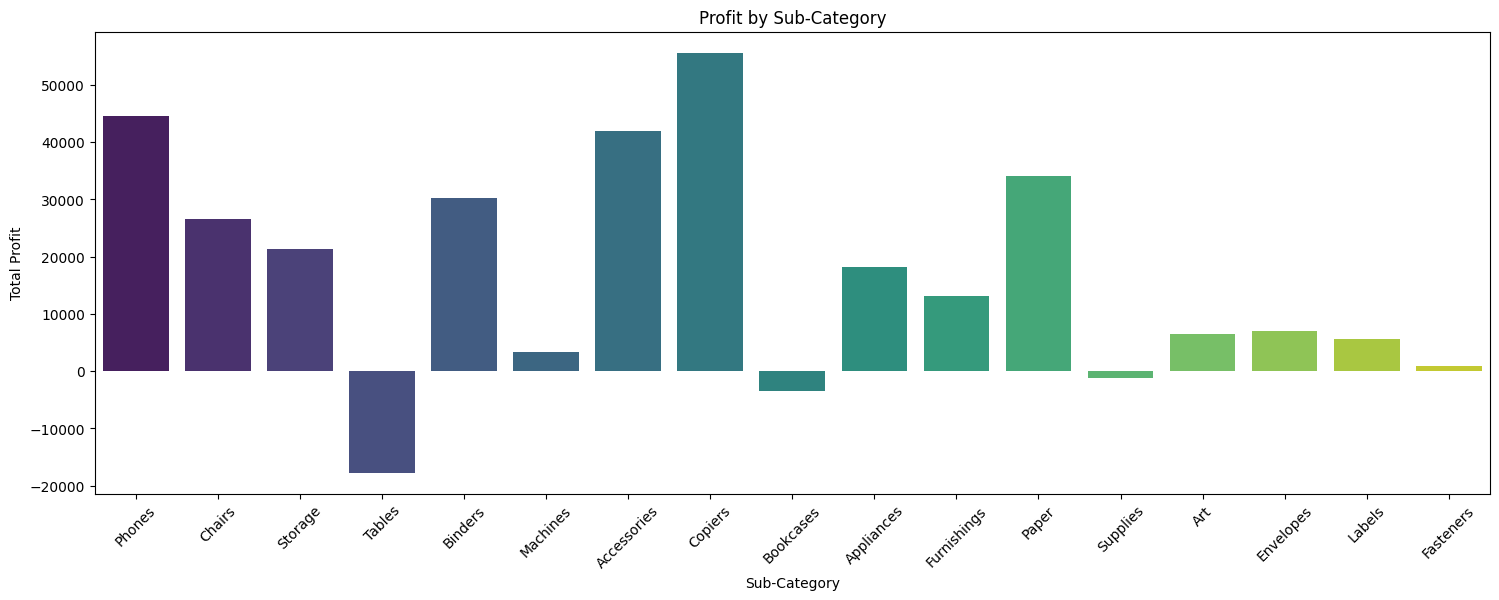

In [24]:
# Aggregate sales and profit by category
category_sales_profit = sales_df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

# Aggregate sales and profit by sub-category
subcategory_sales_profit = sales_df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index().sort_values(by='Sales', ascending=False)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Sales and Profit by Category
sns.barplot(x='Category', y='Sales', data=category_sales_profit, ax=ax[0], palette='coolwarm')
ax[0].set_title('Sales by Category')
ax[0].set_ylabel('Total Sales')
ax[0].set_xlabel('Category')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Category', y='Profit', data=category_sales_profit, ax=ax[1], palette='coolwarm')
ax[1].set_title('Profit by Category')
ax[1].set_ylabel('Total Profit')
ax[1].set_xlabel('Category')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Sales and Profit by Sub-Category
plt.figure(figsize=(18, 6))
sns.barplot(x='Sub-Category', y='Sales', data=subcategory_sales_profit, palette='viridis')
plt.title('Sales by Sub-Category')
plt.ylabel('Total Sales')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(18, 6))
sns.barplot(x='Sub-Category', y='Profit', data=subcategory_sales_profit, palette='viridis')
plt.title('Profit by Sub-Category')
plt.ylabel('Total Profit')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.show()


## Insights from Sales and Profit Analysis by Category and Sub-Category:

1. By Category: The sales and profit distribution across categories shows significant variation. While Technology and Furniture categories generate high sales, Technology stands out with notably higher profit margins compared to Furniture and Office Supplies. This suggests that technology products, despite possibly lower sales volume than office supplies, yield higher profitability.

2. By Sub-Category: The sales by sub-category analysis reveals that certain sub-categories like Phones and Chairs generate high sales, indicating strong customer demand. However, when looking at profit by sub-category, items like Tables and Bookcases, despite contributing to sales, appear to be less profitable or even loss-making.

## Key Takeaways for Business Strategy:

1. Product Focus: Emphasize high-profit categories and sub-categories in marketing and sales strategies to maximize profitability.

2. Cost Management: For categories like Furniture, where the profit margin is relatively low, consider cost optimization strategies to improve profitability.

3. Product Portfolio Optimization: Evaluate the product mix within less profitable sub-categories to identify opportunities for improvement, discontinuation, or replacement with more profitable alternatives.

## Time Series Forecasting

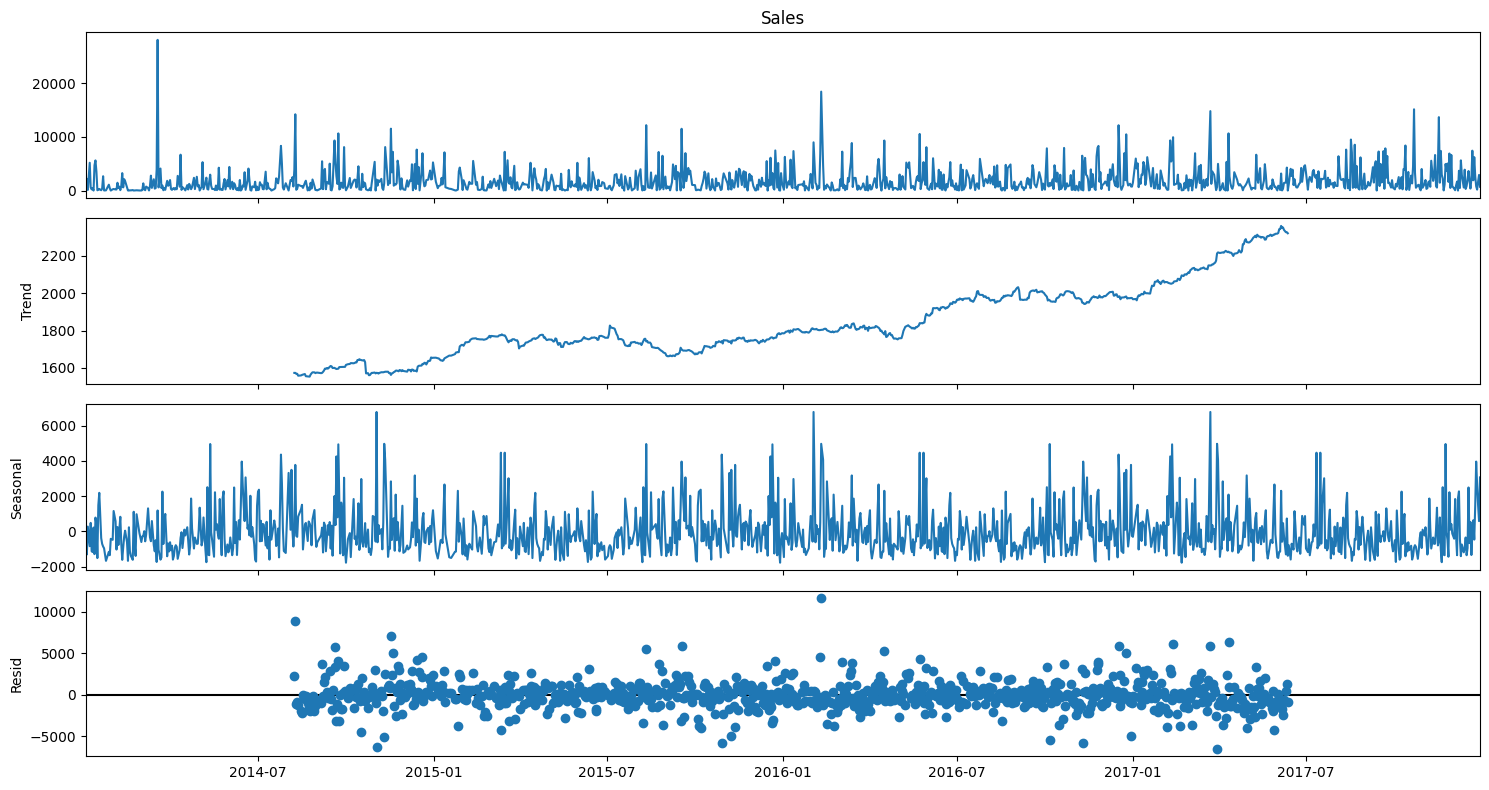

{'Test Statistic': -22.53931389332925,
 'p-value': 0.0,
 'Critical Values': {'1%': -3.4356560275160835,
  '5%': -2.8638831211270817,
  '10%': -2.568017509711682}}

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Setting the order date as index
sales_trends.set_index('Order Date', inplace=True)

# Decomposing the time series
decomposition = seasonal_decompose(sales_trends['Sales'], model='additive', period=365)

# Plotting the decomposition
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.tight_layout()
plt.show()

# Stationarity check using Augmented Dickey-Fuller test
adf_test = adfuller(sales_trends['Sales'])

adf_result = {'Test Statistic': adf_test[0], 'p-value': adf_test[1], 'Critical Values': adf_test[4]}
adf_result


## Time Series Decomposition Insights:

The decomposition of the sales time series into its components—trend, seasonality, and residual—reveals the following:

1. Trend: There's a visible trend component, indicating a change in sales level over time.

2. Seasonality: The seasonality component suggests repeating patterns within the year, which could be tied to specific seasons or months.

3. Residual: The residual component, which captures the irregularities in the data, shows fluctuations that are not explained by the trend or seasonality.

## Stationarity Check:

The Augmented Dickey-Fuller (ADF) test is used to check if the time series is stationary. The test results are:

1. Test Statistic: -22.5393
2. p-value: 0.0
3. Critical Values:
1%: -3.4356
5%: -2.8639
10%: -2.5680

Given that the test statistic is less than the critical values and the p-value is close to 0, we can reject the null hypothesis and conclude that the time series is stationary. This means we can proceed with ARIMA or SARIMA modeling without needing to difference the series to achieve stationarity.

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Using auto_arima to find the optimal SARIMA parameters
auto_arima_result = auto_arima(sales_trends['Sales'], seasonal=True, m=12, stepwise=True,
                               suppress_warnings=True, D=1, max_p=2, max_q=2, max_P=2, max_Q=2,
                               trace=True)

# Best model summary
auto_arima_result.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=12.73 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=23340.122, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=22924.402, Time=2.85 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=23338.183, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=23333.621, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=22748.436, Time=9.15 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=22665.898, Time=25.93 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=12.63 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=28.42 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=23.46 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=22663.067, Time=20.66 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=8.43 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=22751.205, Time=17.81 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                 1237
Model:             SARIMAX(2, 1, [1], 12)   Log Likelihood              -11326.533
Date:                    Fri, 22 Mar 2024   AIC                          22663.067
Time:                            21:47:20   BIC                          22688.620
Sample:                                 0   HQIC                         22672.683
                                   - 1237                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     30.9978     18.776      1.651      0.099      -5.802      67.797
ar.S.L12      -0.2158      0.044     -4.870      0.000      -0.303      -0.129
ar.S.L24      -0.3979      0.031    -12.730      0.000      -0.459      -0.337
ma.S.L12      -0.8341      0.020    -41.626      0.000      -0.873      -0.795
sigma2      7.567e+06   1.64e+05     46.139      0.000    7.25e+06    7.89e+06
===================================================================================
Ljung-Box (L1) (Q):                  13.16   Jarque-Bera (JB):             13602.21
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                             2.53
Prob(H) (two-sided):                  0.19   Kurtosis:                        18.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\adisr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adisr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adisr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['intercept']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\adisr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning

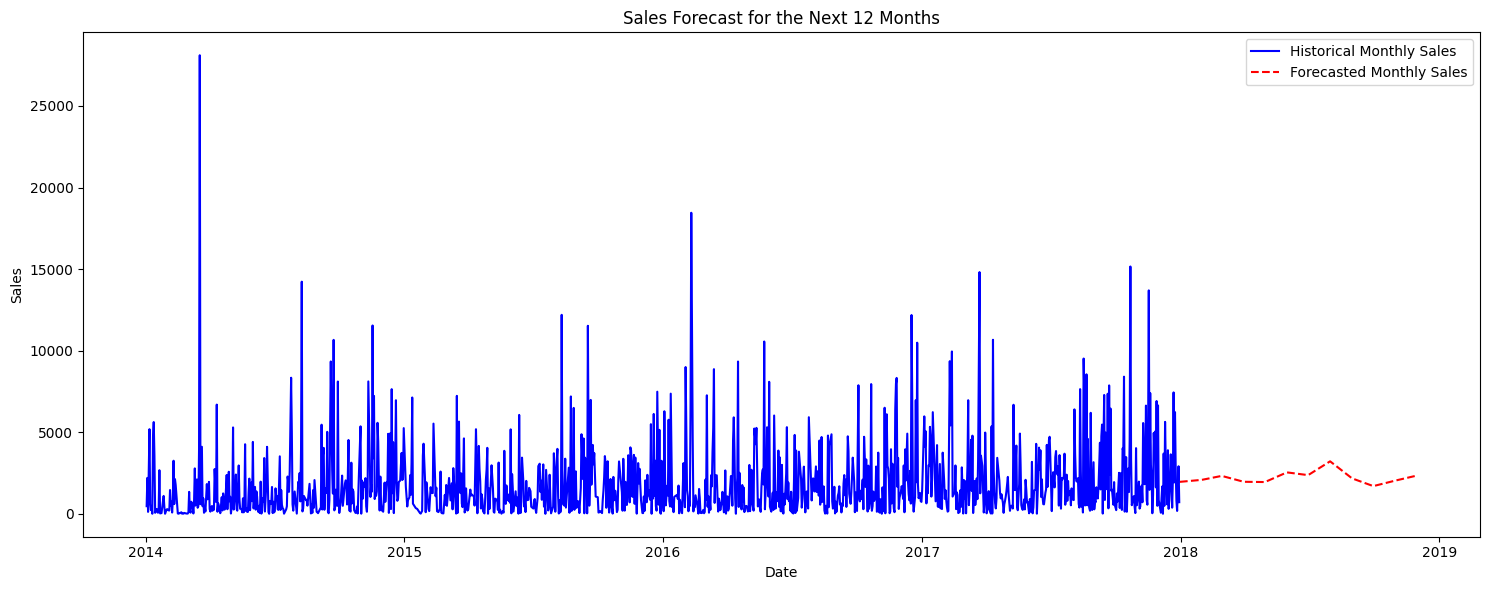

In [29]:
best_model = SARIMAX(sales_trends['Sales'], order=(0, 0, 0), seasonal_order=(2, 1, 1, 12), intercept=True)

best_model_fit = best_model.fit(disp=False)

# Forecasting the next 12 months with the best model
best_forecast = best_model_fit.get_forecast(steps=12)
best_forecast_index = pd.date_range(start=sales_trends.index[-1], periods=12, closed='right', freq='M')
best_forecast_mean = best_forecast.predicted_mean
best_forecast_conf_int = best_forecast.conf_int()

plt.figure(figsize=(15, 6))
plt.plot(sales_trends.index, sales_trends['Sales'], label='Historical Monthly Sales', color='blue')
plt.plot(best_forecast_index, best_forecast_mean, color='red', linestyle='--', label='Forecasted Monthly Sales')
plt.title('Sales Forecast for the Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
# Creating a DataFrame to display the forecasted sales for the next 12 months
forecasted_sales_df = pd.DataFrame({'Month': best_forecast_index, 'Forecasted Sales': best_forecast_mean})
forecasted_sales_df.set_index('Month', inplace=True)

forecasted_sales_df

,Forecasted Sales
Month,
2017-12-31,1960.666238
2018-01-31,2083.118159
2018-02-28,2325.184223
2018-03-31,1963.931440
2018-04-30,1947.760580
2018-05-31,2540.394253
2018-06-30,2371.716744
2018-07-31,3217.821787
2018-08-31,2172.885351
